<a href="https://colab.research.google.com/github/vishalnadagiri/AutoCaption/blob/main/AutoCaption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id  1L0cucNw4dfjNw_8Lx1YsUAMrBp46evJo

Downloading...
From: https://drive.google.com/uc?id=1L0cucNw4dfjNw_8Lx1YsUAMrBp46evJo
To: /content/drive-download-20201227T104425Z-001.zip
120MB [00:01, 91.1MB/s]


In [ ]:
!mv /content/drive-download-20201227T104425Z-001.zip /content/drive/MyDrive/

In [ ]:
!unzip /content/drive/MyDrive/AutoCaption/drive-download-20201227T104425Z-001.zip -d /content/drive/MyDrive/AutoCaption/

Archive:  /content/drive/MyDrive/AutoCaption/drive-download-20201227T104425Z-001.zip
  inflating: /content/drive/MyDrive/AutoCaption/dataset(1).xlsx  
  inflating: /content/drive/MyDrive/AutoCaption/Assignment Submission/Project Github link.pdf  
  inflating: /content/drive/MyDrive/AutoCaption/dataset.xlsx  
  inflating: /content/drive/MyDrive/AutoCaption/Assignment Submission/Image_Description_using_ai.ipynb  
  inflating: /content/drive/MyDrive/AutoCaption/Assignment Submission/Predict_MaterialPatternsandNeckline.ipynb  
  inflating: /content/drive/MyDrive/AutoCaption/Assignment Submission/Image_Description_using_ai.pdf  
  inflating: /content/drive/MyDrive/AutoCaption/assignment.docx  
  inflating: /content/drive/MyDrive/AutoCaption/Assignment Submission/Predict_MaterialPatternsandNeckline.pdf  
  inflating: /content/drive/MyDrive/AutoCaption/images.zip  


In [ ]:
!unzip /content/drive/MyDrive/AutoCaption/images.zip -d /content/drive/MyDrive/AutoCaption/

In [ ]:
!cd /content/drive/MyDrive/AutoCaption/

In [ ]:
!ls


drive  sample_data


In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
ls

drive/  sample_data/


In [ ]:
!pwd

/content


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.applications import vgg16
# from keras.models import Model
import keras
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import glob
import re

# plot_model(model, to_file='vgg.png')

# model = VGG16()
# print(model.summary())


In [3]:
csv_path = f"/content/drive/MyDrive/AutoCaption/extracted/dataset.xlsx"
imag_path = f"/content/drive/MyDrive/AutoCaption/extracted/images/images/" 
df = pd.read_excel(csv_path)
img_files = (glob.glob(imag_path+'*'))

In [4]:
len(img_files)

500

In [5]:
img_files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [6]:
img_files[100:110]

['/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_100.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_101.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_102.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_103.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_104.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_105.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_106.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_107.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_108.jpg',
 '/content/drive/MyDrive/AutoCaption/extracted/images/images/pic_109.jpg']

In [7]:
def prep_img(img_):
    image = load_img(img_, target_size=(250, 250),grayscale=False, color_mode='rgb')
    image = img_to_array(image)
    # print(image.shape)
#     image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    return image

In [8]:
all_data = [img_to_array(load_img(img, target_size=(250, 250))) for img in img_files]
all_data = np.array(all_data)
all_imgs_scaled = all_data.astype('float32')
all_imgs_scaled /= 255

In [9]:
all_data.shape

(500, 250, 250, 3)

In [10]:
all_labels = df.Pattern
le = LabelEncoder()
le.fit(all_labels)
all_labels_enc = le.transform(all_labels)
all_labels_enc = to_categorical(all_labels_enc)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(all_imgs_scaled, all_labels_enc, test_size=0.2, random_state=42)

In [12]:
y_train.shape , y_test.shape

((400, 18), (100, 18))

In [13]:
input_shape = (250,250,3)

In [14]:
#run these sells
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding="same", input_shape=input_shape))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))#changed units to 256 because of resource exhaust
model.add(Dense(18, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
13/13 [==============================] - 11s 527ms/step - loss: 66.3722 - accuracy: 0.2156 - val_loss: 2.3814 - val_accuracy: 0.4100
Epoch 2/20
13/13 [==============================] - 5s 386ms/step - loss: 2.2154 - accuracy: 0.4114 - val_loss: 2.4186 - val_accuracy: 0.4100
Epoch 3/20
13/13 [==============================] - 5s 386ms/step - loss: 2.2676 - accuracy: 0.3916 - val_loss: 2.3973 - val_accuracy: 0.3300
Epoch 4/20
13/13 [==============================] - 5s 388ms/step - loss: 1.9449 - accuracy: 0.4381 - val_loss: 2.1431 - val_accuracy: 0.4200
Epoch 5/20
13/13 [==============================] - 5s 390ms/step - loss: 1.8203 - accuracy: 0.4339 - val_loss: 2.0916 - val_accuracy: 0.4000
Epoch 6/20
13/13 [==============================] - 5s 392ms/step - loss: 1.4710 - accuracy: 0.5636 - val_loss: 2.1433 - val_accuracy: 0.3900
Epoch 7/20
13/13 [==============================] - 5s 391ms/step - loss: 0.9357 - accuracy: 0.6991 - val_loss: 2.9629 - val_accuracy: 0.3800
Epoc

In [17]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


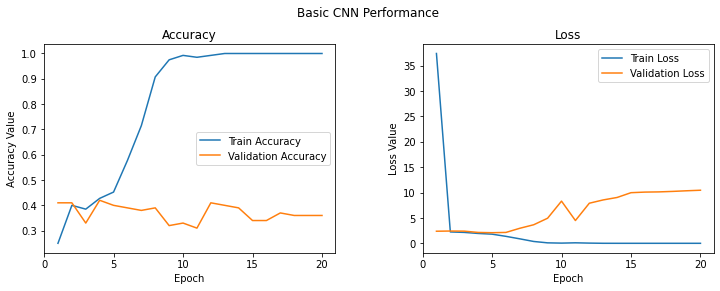

In [18]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,21))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 21, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [19]:
def get_acc(history):
    train_max_acc = max(history.history['accuracy'])
    test_max_acc = max(history.history['val_accuracy'])

    print('Train maximam accuracy achived is ',train_max_acc)
    print('Test maximam accuracy achived is ',test_max_acc)

get_acc(history)

Train maximam accuracy achived is  1.0
Test maximam accuracy achived is  0.41999998688697815


You can clearly see that after 9–12 epochs the model starts overfitting on the training data. The average accuracy we get in our validation set is around 42%

## Try CNN Model with Regularization

In [20]:
model_reg = Sequential()

model_reg.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=(250,250,3)))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Flatten())
#adding two desnse layers with dropout to mask the 30% of the units
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.3))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.3))
model_reg.add(Dense(18, activation='softmax'))#using sigmoid at output layer

In [21]:
model_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 128)      

In [23]:
history_reg = model_reg.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=10, epochs=20)#trainging 10 sample on each iteration. so there will be 40 iteration per epoch

Epoch 1/20
40/40 [==============================] - 2s 26ms/step - loss: 2.5146 - accuracy: 0.3330 - val_loss: 2.1521 - val_accuracy: 0.4100
Epoch 2/20
40/40 [==============================] - 1s 22ms/step - loss: 2.1061 - accuracy: 0.3642 - val_loss: 2.1690 - val_accuracy: 0.4100
Epoch 3/20
40/40 [==============================] - 1s 22ms/step - loss: 2.0236 - accuracy: 0.4003 - val_loss: 2.0462 - val_accuracy: 0.4400
Epoch 4/20
40/40 [==============================] - 1s 22ms/step - loss: 1.8620 - accuracy: 0.3849 - val_loss: 1.9766 - val_accuracy: 0.4200
Epoch 5/20
40/40 [==============================] - 1s 22ms/step - loss: 1.7049 - accuracy: 0.4765 - val_loss: 1.7895 - val_accuracy: 0.5100
Epoch 6/20
40/40 [==============================] - 1s 22ms/step - loss: 1.6206 - accuracy: 0.5161 - val_loss: 1.8429 - val_accuracy: 0.4700
Epoch 7/20
40/40 [==============================] - 1s 22ms/step - loss: 1.4949 - accuracy: 0.5245 - val_loss: 1.8623 - val_accuracy: 0.5400
Epoch 8/20
40

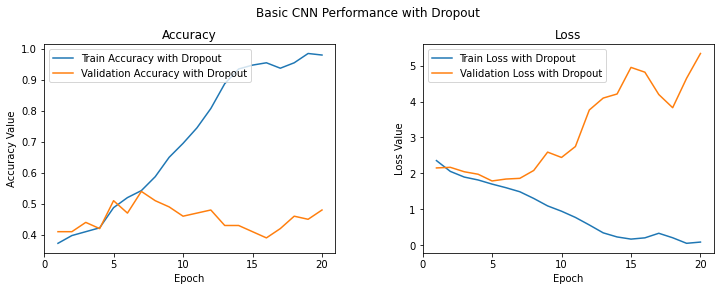

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with Dropout', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,21))
ax1.plot(epoch_list, history_reg.history['accuracy'], label='Train Accuracy with Dropout')
ax1.plot(epoch_list, history_reg.history['val_accuracy'], label='Validation Accuracy with Dropout')
ax1.set_xticks(np.arange(0, 21, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_reg.history['loss'], label='Train Loss with Dropout')
ax2.plot(epoch_list, history_reg.history['val_loss'], label='Validation Loss with Dropout')
ax2.set_xticks(np.arange(0, 21, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [25]:
get_acc(history_reg)

Train maximam accuracy achived is  0.9850000143051147
Test maximam accuracy achived is  0.5400000214576721



After adding dropout to mask off the 30% of the units of desn layer we can see validation accuracy increased by 42 - ~54% 




## Now CNN Model with Image Augmentation

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
batch_size=32
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(all_data, all_labels_enc, test_size=0.2, random_state=42)

# all_data
train_generator = train_datagen.flow(X_train_raw, y_train_raw, batch_size=10)
val_generator = val_datagen.flow(X_test_raw, y_test_raw, batch_size=5)
input_shape = (250, 250, 3)

In [31]:
history_IA = model_reg.fit_generator(train_generator, steps_per_epoch=40, epochs=20,
                              validation_data=val_generator, validation_steps=10, ) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
40/40 [==============================] - 5s 133ms/step - loss: 2.0185 - accuracy: 0.3950 - val_loss: 2.2103 - val_accuracy: 0.3400
Epoch 2/20
40/40 [==============================] - 5s 129ms/step - loss: 1.9231 - accuracy: 0.3975 - val_loss: 1.9564 - val_accuracy: 0.4000
Epoch 3/20
40/40 [==============================] - 5s 129ms/step - loss: 1.9197 - accuracy: 0.3675 - val_loss: 2.1032 - val_accuracy: 0.4200
Epoch 4/20
40/40 [==============================] - 5s 130ms/step - loss: 1.8680 - accuracy: 0.4175 - val_loss: 2.1130 - val_accuracy: 0.4400
Epoch 5/20
40/40 [==============================] - 5s 131ms/step - loss: 1.8703 - accuracy: 0.3950 - val_loss: 1.8604 - val_accuracy: 0.4800
Epoch 6/20
40/40 [==============================] - 5s 131ms/step - loss: 1.8951 - accuracy: 0.3850 - val_loss: 2.4855 - val_accuracy: 0.3200
Epoch 7/20
40/40 [==============================] - 5s 132ms/step - loss: 1.8611 - accuracy: 0.4050 - val_loss: 2.4129 - val_accuracy: 0.3600
Epoch 

In [56]:
def get_plot(history,ep):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle('Basic CNN Performance with Dropout & image augmentation', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,ep+1))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, ep+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, ep+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

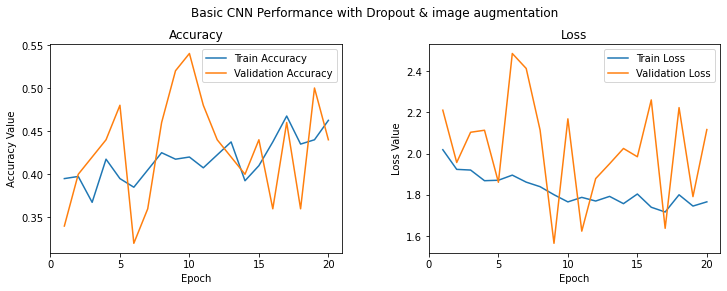

In [57]:
get_plot(history_IA,20)

In [33]:
get_acc(history_IA)

Train maximam accuracy achived is  0.4675000011920929
Test maximam accuracy achived is  0.5400000214576721


We get a validation accuracy jump to around 54%, we can see the decrease in train_accuracy which indicating our model isn’t overfitting anymore

## Now comes Transfer learning VGG16 

### Pre-trained CNN model as a Feature Extractor

In [34]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

58892288/58889256 [==============================] - 0s 0us/step


In [35]:
input_shape

(250, 250, 3)

In [36]:
vgg.layers

In [37]:
vgg.layers[-1]

In [38]:
output = vgg.layers[-1].output
output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [39]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [40]:
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
# vgg_model = Model(vgg.input, output)

In [41]:
output

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten_2')>

In [42]:
vgg_model = Model(vgg.input, output)

In [43]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0   

In [44]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [45]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, X_train) #all_imgs_scaled --> X_train, X_test, y_train, y_test ==> all are scalled
validation_features_vgg = get_bottleneck_features(vgg_model, X_test)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (400, 25088) 	Validation Bottleneck Features: (100, 25088)


In [46]:
from keras.layers import InputLayer
input_shape = vgg_model.output_shape[1]
input_shape

25088

In [47]:


model_ftr_ex = Sequential()
model_ftr_ex.add(InputLayer(input_shape=(input_shape,)))
model_ftr_ex.add(Dense(512, activation='relu', input_dim=input_shape))
model_ftr_ex.add(Dropout(0.3))
model_ftr_ex.add(Dense(512, activation='relu'))
model_ftr_ex.add(Dropout(0.3))
model_ftr_ex.add(Dense(18, activation='softmax'))

In [48]:
model_ftr_ex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_ftr_ex.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 18)                9234      
Total params: 13,117,458
Trainable params: 13,117,458
Non-trainable params: 0
_________________________________________________________________


In [49]:
history_ftr_ex = model_ftr_ex.fit(x=train_features_vgg, y=y_train,
                    validation_data=(validation_features_vgg, y_test),
                    batch_size=10,
                    epochs=30)

Epoch 1/30
40/40 [==============================] - 1s 9ms/step - loss: 5.9056 - accuracy: 0.2282 - val_loss: 2.0318 - val_accuracy: 0.4200
Epoch 2/30
40/40 [==============================] - 0s 6ms/step - loss: 2.0256 - accuracy: 0.4197 - val_loss: 1.9280 - val_accuracy: 0.4400
Epoch 3/30
40/40 [==============================] - 0s 6ms/step - loss: 1.5390 - accuracy: 0.5742 - val_loss: 1.8260 - val_accuracy: 0.5200
Epoch 4/30
40/40 [==============================] - 0s 6ms/step - loss: 1.4151 - accuracy: 0.6080 - val_loss: 1.9135 - val_accuracy: 0.5000
Epoch 5/30
40/40 [==============================] - 0s 6ms/step - loss: 1.3315 - accuracy: 0.6141 - val_loss: 1.7860 - val_accuracy: 0.5300
Epoch 6/30
40/40 [==============================] - 0s 6ms/step - loss: 1.0280 - accuracy: 0.6844 - val_loss: 1.7031 - val_accuracy: 0.5800
Epoch 7/30
40/40 [==============================] - 0s 6ms/step - loss: 0.7920 - accuracy: 0.7409 - val_loss: 1.8477 - val_accuracy: 0.5400
Epoch 8/30
40/40 [==

In [50]:
get_acc(history_ftr_ex)

Train maximam accuracy achived is  0.8349999785423279
Test maximam accuracy achived is  0.5899999737739563


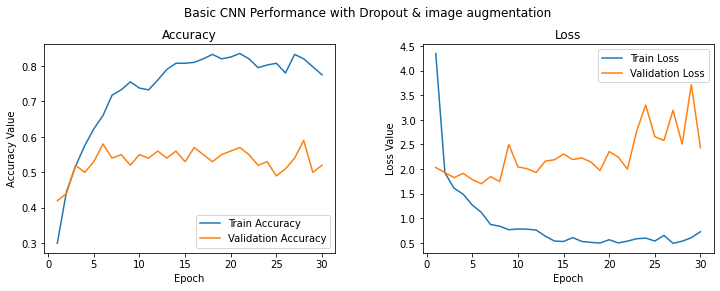

In [58]:
get_plot(history_ftr_ex,30)

in the above model we can see increase in train accuracy as well as test accuracy from the previous model

## VGG-16 model with Fine-tuning and Image Augmentation

Using the VGG-16 model and unfreeze convolution blocks 4 and 5 while keeping the first three blocks frozen. 

In [59]:

input_shape = (250, 250, 3)
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
# layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]

Using image augmentation

In [ ]:
# data_datagen = ImageDataGenerator( zoom_range=0.3, rotation_range=30,
#                                    width_shift_range=0.1, height_shift_range=0.1,  
#                                    horizontal_flip=True, fill_mode='nearest')
# val_datagen = ImageDataGenerator(rescale=1./255)


# X_train_raw_tl, X_test_raw_tl, y_train_raw_tl, y_test_raw_tl = train_test_split(all_data, all_labels_enc, test_size=0.25, random_state=42)

# all_data
# train_generator = train_datagen.flow(X_train_raw_tl, y_train_raw_tl, batch_size=10)
# val_generator = val_datagen.flow(X_test_raw_tl, y_test_raw_tl, batch_size=5)
# input_shape = (150, 150, 3)

In [60]:
model_FT_IA = Sequential()
model_FT_IA.add(vgg_model)
model_FT_IA.add(Dense(1024, activation='relu'))
model_FT_IA.add(Dropout(0.5))
model_FT_IA.add(Dense(18, activation='softmax'))

In [61]:
model_FT_IA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_FT_IA.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Functional)         (None, 25088)             14714688  
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 18)                18450     
Total params: 40,424,274
Trainable params: 38,688,786
Non-trainable params: 1,735,488
_________________________________________________________________


In [62]:
# history_FT_IA = model_FT_IA.fit_generator(data_datagen.flow(X_train_raw_tl, y_train_raw_tl, batch_size=32), validation_data=(X_test_raw_tl, y_test_raw_tl), epochs=100)
# X_train_raw_tl, X_test_raw_tl, y_train_raw_tl, y_test_raw_tl
history_FT_IA = model_FT_IA.fit_generator(train_generator, steps_per_epoch=40, epochs=50,
                              validation_data=val_generator, validation_steps=10, )  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
40/40 [==============================] - 9s 188ms/step - loss: 5.9029 - accuracy: 0.2433 - val_loss: 2.0907 - val_accuracy: 0.2200
Epoch 2/50
40/40 [==============================] - 7s 169ms/step - loss: 2.1560 - accuracy: 0.3251 - val_loss: 1.8666 - val_accuracy: 0.4600
Epoch 3/50
40/40 [==============================] - 7s 172ms/step - loss: 2.0846 - accuracy: 0.3876 - val_loss: 2.6264 - val_accuracy: 0.3600
Epoch 4/50
40/40 [==============================] - 7s 173ms/step - loss: 2.0836 - accuracy: 0.4001 - val_loss: 2.1611 - val_accuracy: 0.3800
Epoch 5/50
40/40 [==============================] - 7s 171ms/step - loss: 1.9881 - accuracy: 0.4073 - val_loss: 14.1004 - val_accuracy: 0.0400
Epoch 6/50
40/40 [==============================] - 7s 171ms/step - loss: 3.2596 - accuracy: 0.3649 - val_loss: 2.0738 - val_accuracy: 0.3800
Epoch 7/50
40/40 [==============================] - 7s 171ms/step - loss: 2.0279 - accuracy: 0.4008 - val_loss: 2.5021 - val_accuracy: 0.3800
Epoch

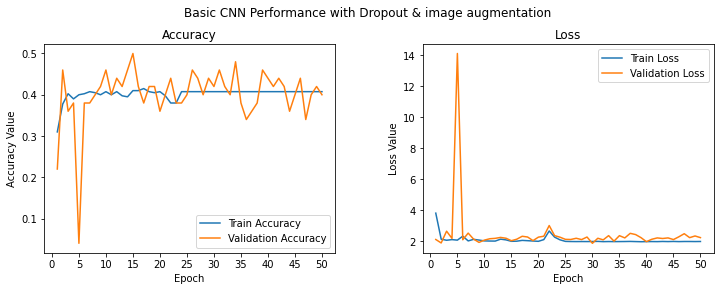

In [64]:
get_plot(history_FT_IA,50)

In [65]:
get_acc(history_FT_IA)

Train maximam accuracy achived is  0.41499999165534973
Test maximam accuracy achived is  0.5


THe above model did not give better result so 
<br>lets try previous model with IA

# VGG16FEx with IA

In [77]:
len(train_generator)

40

In [78]:
train_fex_Ia = get_bottleneck_features(vgg_model,train_datagen.flow(X_train,batch_size=10))

In [79]:
test_fex_Ia = get_bottleneck_features(vgg_model,val_datagen.flow(X_test,batch_size=5))

In [83]:
history_FT_IA = model_ftr_ex.fit(x=train_fex_Ia,y=y_train,validation_data=(test_fex_Ia,y_test),epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 13ms/step - loss: 1.9507 - accuracy: 0.4075 - val_loss: 2.2019 - val_accuracy: 0.4100
Epoch 2/20
13/13 [==============================] - 0s 10ms/step - loss: 1.9449 - accuracy: 0.4075 - val_loss: 2.2015 - val_accuracy: 0.4100
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 1.9452 - accuracy: 0.4075 - val_loss: 2.2026 - val_accuracy: 0.4100
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 1.9463 - accuracy: 0.4075 - val_loss: 2.2032 - val_accuracy: 0.4100
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 1.9614 - accuracy: 0.4075 - val_loss: 2.2019 - val_accuracy: 0.4100
Epoch 6/20
13/13 [==============================] - 0s 10ms/step - loss: 1.9461 - accuracy: 0.4075 - val_loss: 2.2023 - val_accuracy: 0.4100
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 1.9491 - accuracy: 0.4075 - val_loss: 2.2037 - val_accuracy: 0.4100
Epoch 8/20
13

In [84]:
history_FT_IA = model_ftr_ex.fit_generator(get_bottleneck_features(vgg_model,train_datagen.flow(X_train,batch_size=10)),
                                           get_bottleneck_features(vgg_model,val_datagen.flow(X_test,batch_size=5)),epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

# Need to know how to use feature extraction with fit_generator

In [68]:
'''
PPatterns = pattern_model.fit_generator(generator.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=100)
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, X_train) #all_imgs_scaled --> X_train, X_test, y_train, y_test ==> all are scalled
validation_features_vgg = get_bottleneck_features(vgg_model, X_test)
'''

# PPatterns = pattern_model.fit_generator(generator.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=100)

history_FEx_IM = model_ftr_ex.fit_generator(train_generator.flow(X_train, y_train), steps_per_epoch=40, epochs=50,
                              validation_data=(X_test,y_test), validation_steps=10, )


AttributeError: ignored

# so far best model for label prediction to use for other labes like material and neckline we can train the model using VGG16 feature extractor